In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [2]:
DATA_PATH = '../data/train.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


## Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

The table above shows that there are 7905 rows and 20 columns, and there are no null values.

#### Let's rectify the null data.

In [4]:
for i in df.columns:
    print(i, df[i].unique()) 

id [   0    1    2 ... 7902 7903 7904]
N_Days [ 999 2574 3428 2576  788  703 1300 1615 2050 2615 3581 1614 1847 1153
  904 1212 1967 1592 1481 3358 3092  326 2363 1152 3577  799 1832 4467
 2301  943 1882 3244 3090  850 2168 1786 1455  334 1363 3170 4032 2835
 1434 3913  994 1666 3820 1149  930 2157 2555 1776 4050   51 3445 1765
 3458  552 2769 4453 2504  980  853  786 3395 2357  549 1447  732  597
  708 2105 1295 2419 3098  769 1083 1785 1657 1418  737 1701 2598 2891
 1234 3933 1271 3099 1831 3707  191 2318 1321 1420  794 1690 3672  837
 1349 2556 4523 1170 1191 1367 1412 4509 2294 2976 1303 1250 2255 1293
 3149 1433 2583 3086 2297 1908 1000 2224 4190 4500 1978 2386 2624 4079
 1568 3422 4365 3336 1576 2990  762 1951 3839  974 2403 1649 2022 1770
 3297 1569 1297 2713 1282   77 1197 4039 1302  304 1487 2365 2170  321
 1725  971 1077 3468 2350 1677 1216  385 2657 1945 1408 1444 1702 1030
  179 1360 1525 1682  877  890 1165 2330 1783  939  216 4556  735 2449
 1932 3574 3853  223 3282 1012 

In the previous cell, the unique values of each column are displayed, and it can be observed that none of the columns have null values.

#### There are float-type columns that could perfectly be integers.

In [5]:
df['Cholesterol'] = df['Cholesterol'].astype('int64')
df['Copper'] = df['Copper'].astype('int64')
df['Tryglicerides'] = df['Tryglicerides'].astype('int64')
df['Platelets'] = df['Platelets'].astype('int64')
df['Stage'] = df['Stage'].astype('int64')

#### Now, with the help of the ydata-profiling library, which performs a general automatic exploration of the data through a report.

In [24]:
profile = ProfileReport(df, title="Cirrhosis Profiling Report", variables = {"description":{
    'id': 'A unique identifier for each patient.',
    'N_Days': 'Number of days elapsed from a reference point.',
    'Drug': 'The type of medication administered or used in treatment.',
    'Age': 'The age of the patient in years.',
    'Sex': 'The gender of the patient.',
    'Ascites': 'Presence or absence of ascites, an abnormal accumulation of fluid in the abdominal cavity.',
    'Hepatomegaly': 'Indicates whether there is hepatomegaly, which is the enlargement of the liver.',
    'Spiders': 'Presence or absence of "spiders" (vascular lesions), which are skin lesions associated with liver diseases.',
    'Edema': 'Presence or absence of edema, the accumulation of fluid in tissues.',
    'Bilirubin': 'Levels of bilirubin in the blood.',
    'Cholesterol': 'Levels of cholesterol in the blood.',
    'Albumin': 'Levels of albumin in the blood.',
    'Copper': 'Levels of copper in the body.',
    'Alk_Phos': 'Levels of alkaline phosphatase in the blood.',
    'SGOT': 'Levels of the enzyme aspartate aminotransferase (SGOT or AST) in the blood, an indicator of liver damage.',
    'Tryglicerides': 'Levels of triglycerides in the blood.',
    'Platelets': 'Quantity of platelets in the blood.',
    'Prothrombin': 'Prothrombin time.',
    'Stage': 'The stage of the disease or medical condition of the patient.',
    'Status': 'The status of the patient, with values \'C\' (Compensated), \'D\' (Decompensated), or \'CL\' (Controlled).'
}})

#### If you want to have a better view of the report, you can open the 'eda_report.html' file located in the same folder as this file.

In [26]:
profile.to_file("eda_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights 

- The 'id' column has a normal distribution with respect to all its values. This is understandable as each id is a unique value representing each patient, so there are no duplicate values.
- The 'N_Days' column has a mean of 2030 and a median of 1831, indicating that there is not much impact between extreme values. Its maximum value is 41, and the minimum is 4795.
- The 'Drug' column has two values ('D-penicillamine', 'Placebo'), with a balanced distribution as there are 4010 and 3895 entries for each, respectively.
- It seems that the 'Age' column is given in days. The youngest patient is approximately 27 years old, and the oldest is 79 years old. Considering their distribution, extreme values do not affect much since their mean and median are quite close (18373.146-18713, corresponding to 51-52 years, respectively).
- Within the 'Sex' variable, there is an imbalance in the data, with the majority of patients being female, accounting for 92.8% of the data, while male patients are a minority, representing 7.2% of the data.
- The 'Ascites' variable represents the presence of abdominal fluid, and the data shows that most patients do not yet have this characteristic. 95.2% of the data do not have Ascites, while 4.8% of patients do, indicating a data imbalance in this column.
- The 'Hepatomegaly' characteristic is relatively balanced. The difference between patients with an enlarged liver and those without is hardly noticeable (2.2%).
- Regarding the presence of spider angiomas, the 'spiders' column shows a notable imbalance in its values, with the majority of patients not presenting this symptom (5966 patients), while the remaining patients (1939) have spider angiomas.
- For the 'Edema' column, there is a very notable imbalance. Most patients (90.6%) do not have this condition, while the rest do. Similarly, those with edema are divided into two categories, almost equally representing 5% and 4.4%.
- The 'Bilirubin' variable is quite skewed, with most values approaching 0. There are extreme values, with 28 being the largest value present in this column.
- Similarly, the 'Cholesterol' column is skewed, with extreme values present, causing the skewness towards the right, where there are more minimum values around the value of 298. The highest value is 1775.
- Blood albumin levels are the characteristic that is best distributed, following a normal distribution. Its mean and median are quite close.
- Copper levels indicate a right skew in the distribution of the data. Its minimum value is 4, and its maximum value is 588. The considerable difference between its mean and median indicates extreme values.
- Similarly, alkaline phosphatase levels are skewed to the right.
- The 'SGOT' column has a slight right skew, with extreme values representing levels of 457.25 for this characteristic.
- Like the previous columns, triglycerides show a right skew as most values hover around the levels of 104. There are extreme values where the maximum is 598.
- The 'Platelets' column has a better distribution. The variance in the data is not as noticeable, and extreme values do not affect its distribution.
- For the 'Prothrombin' characteristic, its distribution is somewhat strange. It has super extreme values and is skewed to the right, although its mean and median are quite close.
- In the stage each patient is in, their values are somewhat unbalanced. The value present in most of the data is '3,' accounting for approximately 40%, followed by stage '4,' which accounts for 34.2% of the data. In third place is stage '2,' representing 21%, and lastly, stage '1,' being the minority in this column with only 397 records.
- Finally, our target variable 'Status,' the variable intended to be classified, is somewhat unbalanced in terms of its categories. The 'C' state is dominant with 4965 records, followed by state 'D,' which has 2665, and lastly, the minority 'CL,' which only has 275 patients.

#### Correlation 

In [6]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [7]:
df_numeric = df_numeric.drop(['id'], axis=1)

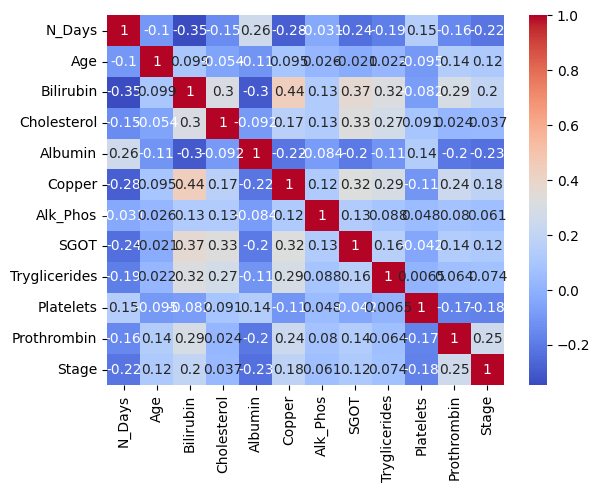

In [8]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

The correlation table shows that there is no strong correlation between the variables, so we don't have an issue of multicollinearity.

## Data Preparation

### We will convert the categorical variables to numeric.

In [9]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,D-penicillamine,M,N,N,N,N,D
1,Placebo,F,N,N,N,N,C
2,Placebo,F,N,Y,Y,Y,D
3,Placebo,F,N,N,N,N,C
4,Placebo,F,N,Y,N,N,C


In [10]:
df_copy = df.copy()

In [11]:
le = LabelEncoder()
df_copy = df_copy.apply(le.fit_transform)
df_copy.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,97,0,305,1,0,0,0,0,20,97,69,123,227,162,13,195,7,2,2
1,1,350,1,228,0,0,0,0,0,6,128,87,52,210,121,38,182,20,2,0
2,2,414,1,57,0,0,1,1,2,30,87,88,105,130,102,4,68,27,3,2
3,3,351,1,201,0,0,0,0,0,3,56,83,48,237,30,46,119,17,2,0
4,4,69,1,138,0,0,1,0,0,8,118,98,52,174,109,46,140,16,3,0


In [12]:
df_full_train = df_copy.copy()
df_full_train = df_full_train.drop(['id'], axis=1)
df_full_train.to_csv('../data/train_processed.csv', index=False)

## Feature Selection

- We can perform feature selection to reduce the number of variables and improve the model's performance.

In [13]:
df_full_train.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.20, random_state=1, stratify=df.Status)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.Status.values
y_val = df_val.Status.values

del df_train['Status']
del df_val['Status']

In [15]:
len(df_train), len(df_val), len(y_train), len(y_val)

(6324, 1581, 6324, 1581)

#### Iterate over the features and check the logloss of each one

#### LogLoss

$$  \text{LogLoss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{ij} \cdot \log(p_{ij})  $$

where:
- N is the total number of instances in the dataset.
- M is the number of classes.
- yij​ is 1 if instance ibbelongs to class j, and 0 otherwise.
- pij​ is the predicted probability that instance i belongs to class j.

LogLoss measures the agreement between the predicted probabilities and the true labels. The goal is to minimize the LogLoss value when evaluating a classification model. The metric penalizes incorrect predictions more heavily when the model is more confident and assigns high probabilities to the incorrect class.

In [16]:
columnas = ['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
resultable = []
for i in range(len(columnas)):
    model = LogisticRegression(solver='lbfgs', random_state=1)
    model.fit(df_train.iloc[:,[i]], y_train)

    y_pred = model.predict_proba(df_val.iloc[:,[i]])

    log_loss_metric = log_loss(y_val, y_pred)

    resultable.append([columnas[i], log_loss_metric])

In [17]:
resultable = pd.DataFrame(resultable, columns=['Feature', 'Logloss'])
resultable

,Feature,Logloss
0,N_Days,0.696694
1,Drug,0.776406
2,Age,0.759106
3,Sex,0.768152
4,Ascites,0.744798
5,Hepatomegaly,0.701176
6,Spiders,0.730433
7,Edema,0.718990
8,Bilirubin,0.651729
9,Cholesterol,0.759328


In [18]:
best_result_table = resultable.sort_values('Logloss', ascending=True)
best_result_table.reset_index(drop=True, inplace=True)
best_result_table

,Feature,Logloss
0,Bilirubin,0.651729
1,Copper,0.676298
2,N_Days,0.696694
3,Stage,0.700347
4,Hepatomegaly,0.701176
5,Prothrombin,0.704911
6,SGOT,0.712987
7,Edema,0.718990
8,Spiders,0.730433
9,Albumin,0.736429


In [19]:
featuresN = [best_result_table.Feature[0]]
limit = best_result_table.Logloss[0]

In [20]:
for i in range(1, len(best_result_table)):
    featuresN.append(best_result_table.iloc[i, 0])
    datosZ = df_train.loc[:, featuresN]
    modeloZ = LogisticRegression(solver='lbfgs', random_state=1)
    modeloZ.fit(datosZ, y_train)
    
    prediccionesZ = modeloZ.predict_proba(df_val.loc[:, featuresN])
    
    loglossZ = log_loss(y_val, prediccionesZ)

    print(featuresN, loglossZ)
    
    if loglossZ < limit:
        limit = loglossZ
    else:
        del featuresN[-1]

print(len(featuresN))
print(limit)

['Bilirubin', 'Copper'] 0.62655966956733
['Bilirubin', 'Copper', 'N_Days'] 0.6078858464783903


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Stage'] 0.5838951313757397
['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly'] 0.5794747015316253


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin'] 0.57483303778959
['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'SGOT'] 0.5769130778188939


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema'] 0.5712062103928975
['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders'] 0.5710091641058422


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Albumin'] 0.5797793946483768
['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Ascites'] 0.5766581613789737


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Platelets'] 0.5738274740122062
['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Tryglicerides'] 0.5817687460986481


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Age'] 0.5730617407489322
['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Cholesterol'] 0.5854751193343539


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Alk_Phos'] 0.5998185640239958
['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Sex'] 0.578227511075111
['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders', 'Drug'] 0.5775153916594614
8
0.5710091641058422


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Based on Logloss, the following variables are selected:

['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders']

### According to AUC

In [21]:
columnas = ['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
resultableAUC = []
for i in range(len(columnas)):
    model = LogisticRegression(solver='lbfgs', random_state=1)
    model.fit(df_train.iloc[:,[i]], y_train)

    y_pred = model.predict_proba(df_val.iloc[:,[i]])

    AUC_metric = roc_auc_score(y_val, y_pred, multi_class='ovr')
    resultableAUC.append([columnas[i], AUC_metric])

In [22]:
resultableAUC = pd.DataFrame(resultableAUC, columns=['Feature', 'AUC'])
resultableAUC

,Feature,AUC
0,N_Days,0.696222
1,Drug,0.495686
2,Age,0.610337
3,Sex,0.534829
4,Ascites,0.535607
5,Hepatomegaly,0.636030
6,Spiders,0.603800
7,Edema,0.562314
8,Bilirubin,0.789503
9,Cholesterol,0.588579


In [23]:
best_result_tableAUC = resultableAUC.sort_values('AUC', ascending=False)
best_result_tableAUC.reset_index(drop=True, inplace=True)
best_result_tableAUC

,Feature,AUC
0,Bilirubin,0.789503
1,Copper,0.738823
2,N_Days,0.696222
3,SGOT,0.679683
4,Stage,0.677614
5,Prothrombin,0.642357
6,Hepatomegaly,0.636030
7,Age,0.610337
8,Spiders,0.603800
9,Albumin,0.597956


In [24]:
featuresNAUC = [best_result_tableAUC.Feature[0]]
limitAUC = best_result_tableAUC.AUC[0]

In [25]:
for i in range(1, len(best_result_tableAUC)):
    featuresNAUC.append(best_result_tableAUC.iloc[i, 0])
    datosZ = df_train.loc[:, featuresNAUC]
    modeloZ = LogisticRegression(solver='lbfgs', random_state=1)
    modeloZ.fit(datosZ, y_train)
    
    prediccionesZ = modeloZ.predict_proba(df_val.loc[:, featuresNAUC])
    
    AUC_metric = roc_auc_score(y_val, prediccionesZ, multi_class='ovr')

    print(featuresNAUC, AUC_metric)
    
    if AUC_metric > limitAUC:
        limitAUC = AUC_metric
    else:
        del featuresNAUC[-1]

print(len(featuresNAUC))
print(limitAUC)

['Bilirubin', 'Copper'] 0.7969459864334674
['Bilirubin', 'Copper', 'N_Days'] 0.800006531465006


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'SGOT'] 0.7945239465530086
['Bilirubin', 'Copper', 'N_Days', 'Stage'] 0.7872466104961774


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Prothrombin'] 0.786744179918944
['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly'] 0.812071386203484


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Age'] 0.802453963915569
['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Spiders'] 0.7887577484289809
['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Albumin'] 0.77914728499002
['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Platelets'] 0.7951171815243526


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Tryglicerides'] 0.7881458469979306
['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Cholesterol'] 0.7829947317879138


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Alk_Phos'] 0.7785810551582015
['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Edema'] 0.7927588588436677


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Ascites'] 0.8083905573638761
['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Sex'] 0.7983731121254479
['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly', 'Drug'] 0.7897951397899527
4
0.812071386203484


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Based on AUC, the following variables are selected:

['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly']

### According to accuracy

In [26]:
columnas = ['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
resultableAcc = []
for i in range(len(columnas)):
    modelAcc = LogisticRegression(solver='lbfgs', random_state=1)
    modelAcc.fit(df_train.iloc[:,[i]], y_train)

    y_pred = modelAcc.predict(df_val.iloc[:,[i]])

    ACC_metric = accuracy_score(y_val, y_pred)

    resultableAcc.append([columnas[i], ACC_metric])

In [27]:
resultableAcc = pd.DataFrame(resultableAcc, columns=['Feature', 'accuracy'])
resultableAcc

,Feature,accuracy
0,N_Days,0.726755
1,Drug,0.628083
2,Age,0.625553
3,Sex,0.637571
4,Ascites,0.664769
5,Hepatomegaly,0.657812
6,Spiders,0.679317
7,Edema,0.690702
8,Bilirubin,0.736243
9,Cholesterol,0.643896


In [28]:
best_result_tableAcc = resultableAcc.sort_values('accuracy', ascending=False)
best_result_tableAcc.reset_index(drop=True, inplace=True)
best_result_tableAcc

,Feature,accuracy
0,Bilirubin,0.736243
1,N_Days,0.726755
2,Copper,0.711575
3,Stage,0.704617
4,Edema,0.690702
5,Prothrombin,0.690702
6,Spiders,0.679317
7,SGOT,0.668564
8,Albumin,0.666667
9,Ascites,0.664769


In [29]:
featuresNAcc = [best_result_tableAcc.Feature[0]]
limitAcc = best_result_tableAcc.accuracy[0]

In [30]:
for i in range(1, len(best_result_tableAcc)):
    featuresNAcc.append(best_result_tableAcc.iloc[i, 0])
    datosZ = df_train.loc[:, featuresNAcc]
    modeloZ = LogisticRegression(solver='lbfgs', random_state=1)
    modeloZ.fit(datosZ, y_train)
    
    prediccionesZ = modeloZ.predict_proba(df_val.loc[:, featuresNAcc])
    
    ACC_metric = roc_auc_score(y_val, prediccionesZ, multi_class='ovr')

    print(featuresNAcc, ACC_metric)
    
    if ACC_metric > limitAcc:
        limitAcc = ACC_metric
    else:
        del featuresNAcc[-1]

print(len(featuresNAcc))
print(limitAcc)

['Bilirubin', 'N_Days'] 0.7860454510974481
['Bilirubin', 'N_Days', 'Copper'] 0.800006531465006


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'N_Days', 'Copper', 'Stage'] 0.7872493885657565
['Bilirubin', 'N_Days', 'Copper', 'Edema'] 0.7960782595489729


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'N_Days', 'Copper', 'Prothrombin'] 0.7867423896779059
['Bilirubin', 'N_Days', 'Copper', 'Spiders'] 0.7835547196982064


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'N_Days', 'Copper', 'SGOT'] 0.7958339043790158
['Bilirubin', 'N_Days', 'Copper', 'Albumin'] 0.8049281460913936


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Ascites'] 0.794229474887452
['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Hepatomegaly'] 0.7790290415370142


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Cholesterol'] 0.7940062399265403
['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets'] 0.8105633751680604


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets', 'Sex'] 0.7864653055291644
['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets', 'Tryglicerides'] 0.8105147523790718


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets', 'Drug'] 0.7779434538441391
['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets', 'Age'] 0.8113817403089727
['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets', 'Age', 'Alk_Phos'] 0.8077174129735628
6
0.8113817403089727


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Based on accuracy, the following variables are selected:

['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets', 'Age']

## Models

Logistic Regression was implemented previously, now we will implement a XGBoost model using all features.

In [31]:
from sklearn.feature_extraction import DictVectorizer
import xgboost as xgb

In [32]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [33]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [34]:
dv.feature_names_

['Age',
 'Albumin',
 'Alk_Phos',
 'Ascites',
 'Bilirubin',
 'Cholesterol',
 'Copper',
 'Drug',
 'Edema',
 'Hepatomegaly',
 'N_Days',
 'Platelets',
 'Prothrombin',
 'SGOT',
 'Sex',
 'Spiders',
 'Stage',
 'Tryglicerides']

In [35]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [36]:
features = dv.feature_names_

In [37]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [38]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,

    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200 )

In [39]:
y_pred = model.predict(dval)

In [40]:
probabilities = model.predict(dval, output_margin=True)
probabilities = np.exp(probabilities) / np.sum(np.exp(probabilities), axis=1, keepdims=True)

In [41]:
roc_auc_score(y_val, probabilities, multi_class='ovr')

0.8746451128158025

In [42]:
log_loss(y_val, probabilities)

0.6213452137751599

In [43]:
accuracy_score(y_val, y_pred)

0.825426944971537

### Best features based on Logloss

['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders']

In [44]:
train_dicts = df_train[['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders']].fillna(0).to_dict(orient='records')

In [45]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [46]:
dv.feature_names_

['Bilirubin',
 'Copper',
 'Edema',
 'Hepatomegaly',
 'N_Days',
 'Prothrombin',
 'Spiders',
 'Stage']

In [47]:
val_dicts = df_val[['Bilirubin', 'Copper', 'N_Days', 'Stage', 'Hepatomegaly', 'Prothrombin', 'Edema', 'Spiders']].fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [48]:
features = dv.feature_names_

In [49]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [50]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,

    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'logloss',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200 )

In [51]:
y_pred = model.predict(dval)

In [52]:
probabilities = model.predict(dval, output_margin=True)
probabilities = np.exp(probabilities) / np.sum(np.exp(probabilities), axis=1, keepdims=True)

In [53]:
roc_auc_score(y_val, probabilities, multi_class='ovr')

0.8415481674957194

In [54]:
log_loss(y_val, probabilities)

0.6264959873336798

In [55]:
accuracy_score(y_val, y_pred)

0.7906388361796332

### Best features based on AUC

['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly']

In [56]:
train_dicts = df_train[['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly']].fillna(0).to_dict(orient='records')

In [57]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [58]:
dv.feature_names_

['Bilirubin', 'Copper', 'Hepatomegaly', 'N_Days']

In [59]:
val_dicts = df_val[['Bilirubin', 'Copper', 'N_Days', 'Hepatomegaly']].fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [60]:
features = dv.feature_names_

In [61]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [62]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,

    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200 )

In [63]:
y_pred = model.predict(dval)

In [64]:
probabilities = model.predict(dval, output_margin=True)
probabilities = np.exp(probabilities) / np.sum(np.exp(probabilities), axis=1, keepdims=True)

In [65]:
print('AUC',roc_auc_score(y_val, probabilities, multi_class='ovr'))
print('logloss',log_loss(y_val, probabilities))
print('Accuracy',accuracy_score(y_val, y_pred))

AUC 0.8316870053395129
logloss 0.6252014127798355
Accuracy 0.7748260594560404


### Best features based on Accuracy

['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets', 'Age']

In [66]:
train_dicts = df_train[['Bilirubin', 'N_Days', 'Copper', 'Albumin', 'Platelets', 'Age']].fillna(0).to_dict(orient='records')

In [67]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [68]:
dv.feature_names_

['Age', 'Albumin', 'Bilirubin', 'Copper', 'N_Days', 'Platelets']

In [69]:
val_dicts = df_val[['Age', 'Albumin', 'Bilirubin', 'Copper', 'N_Days', 'Platelets']].fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [70]:
features = dv.feature_names_

In [71]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [72]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,

    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200 )

In [73]:
y_pred = model.predict(dval)

In [74]:
probabilities = model.predict(dval, output_margin=True)
probabilities = np.exp(probabilities) / np.sum(np.exp(probabilities), axis=1, keepdims=True)

In [75]:
print('AUC',roc_auc_score(y_val, probabilities, multi_class='ovr'))
print('logloss',log_loss(y_val, probabilities))
print('Accuracy',accuracy_score(y_val, y_pred))

AUC 0.8527352499745532
logloss 0.623287937321063
Accuracy 0.7912713472485768


In all cases, metrics worsen when reducing the features. For that reason, all features in the dataset will be used.

### Tuning Hyperparameters

In [76]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [77]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [78]:
dv.feature_names_

['Age',
 'Albumin',
 'Alk_Phos',
 'Ascites',
 'Bilirubin',
 'Cholesterol',
 'Copper',
 'Drug',
 'Edema',
 'Hepatomegaly',
 'N_Days',
 'Platelets',
 'Prothrombin',
 'SGOT',
 'Sex',
 'Spiders',
 'Stage',
 'Tryglicerides']

In [79]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [80]:
features = dv.feature_names_

In [81]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [83]:
# watchlist se usa para evaluar el modelo en el conjunto de validacion
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [86]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))


    columns = ['num_iter','train_auc','val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

#### Learning rate

In [88]:
scores = {}

In [99]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight':1,

    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200,verbose_eval=5, evals= watchlist )

In [100]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [101]:
scores.keys()

dict_keys(['eta=0.1', 'eta=0.3', 'eta=1.0', 'eta=0.5', 'eta=0.01'])

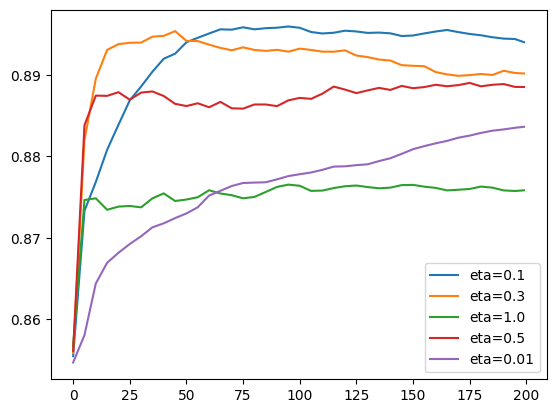

In [102]:
etas = ['eta=0.1', 'eta=0.3', 'eta=1.0', 'eta=0.5', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label = eta)

plt.legend()
plt.show()

The best ETA = 0.1

#### max_depth

In [114]:
scores = {}

In [121]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight':1,

    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200,verbose_eval=5, evals= watchlist )

In [122]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

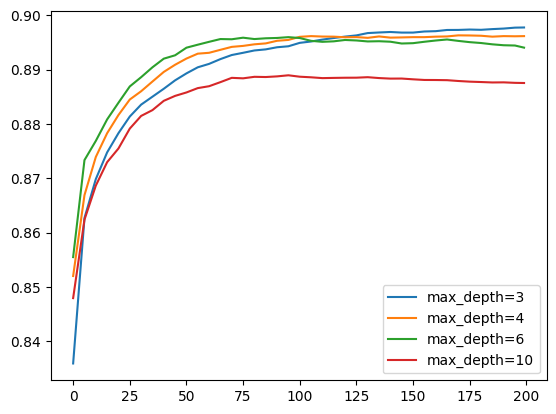

In [123]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth)

# plt.ylim(0.8, 0.84)
plt.legend()
plt.show()

The best max_depth = 3

### min_child_weight

In [124]:
scores = {}

In [129]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':30,

    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200,verbose_eval=5, evals= watchlist )

In [130]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

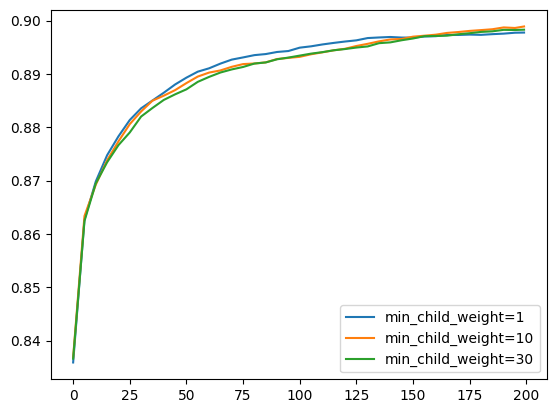

In [131]:
for min_child_wight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = min_child_wight)

# plt.ylim(0.82, 0.84)
plt.legend()
plt.show()

The best min_child_weight = 10

In [139]:
scores = {}

In [140]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':10,

    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 500,verbose_eval=5, evals= watchlist )

In [141]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

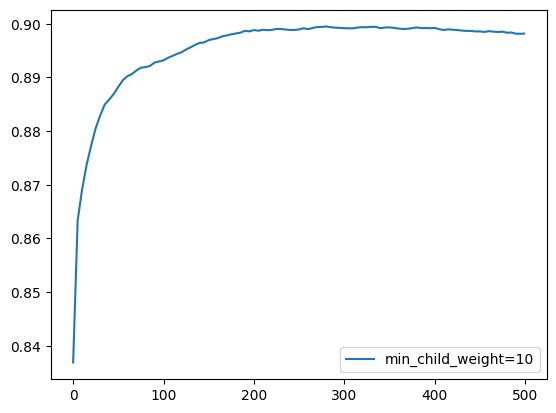

In [142]:
for min_child_wight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = min_child_wight)

# plt.ylim(0.82, 0.84)
plt.legend()
plt.show()

300 trees

What happens if standardize the numeric features?

Check the 'StandarizingFeatures' file.